# 확률적 경사 하강법(Stochastic Gradient Descent)

<img src = "./image/sgd.png">

- 의의
    - 훈련 세트에서 샘플을 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘
    - 샘플을 하나씩 사용하지 않고 여러 개를 사용하면 미니배치 경사 하강법
    - 한 번에 전체 샘플을 사용하면 배치 경사하강법
    
- 손실 함수(loss function)
    - 확률적 경사 하강법이 최적화할 대상
    - 어떤 문제에서 머신러닝 알고리즘이 얼마나 실제값과 오차가 나는지 측정하는 기준
    - 손실 함수의 최솟값을 알 수 없기 때문에 조금씩 찾아나가는 과정이 확률적 경사 하강법
    
- 에포크(epoch)
    - 손실 함수 값을 줄여나가는 과정에서 훈련 세트를 모두 사용하고도 만족할만한 결과에 도달하지 못했다면 다시 처음부터 훈련 세트를 사용함
    - 이렇게 훈련 세트를 한 번 모두 사용하는 과정을 에포크 라고 부름
    - 일반적으로 수십 번에서 수백 번 이상 에포크를 수행함
    
- 특징
    - 샘플 데이터셋에 대해서만 경사를 계산하기 때문에 다루는 데이터가 줄어서 학습 속도가 빠르고 메모리 소모량이 적으며, 큰 데이터셋도 학습이 가능함
    - 학습 과정에 진폭이 크고 배치 경사 하강법보다 불안정하게 움직임

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [2]:
df = pd.read_csv("./data/FISH.csv")

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
x = df.drop(["Species", "Length1"], axis = 1)
y = df["Species"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.25, random_state = 0)

In [6]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [7]:
sgd = SGDClassifier(loss = "log", max_iter = 10, random_state = 0)

- SGDClassifier의 매개변수
    - loss : 손실 함수의 종류를 지정
        - log : 로지스틱 손실 함수
    - max_iter : 수행할 최대 에포크 횟수

In [8]:
sgd.fit(scaled_train, y_train)
print(sgd.score(scaled_train, y_train))
print(sgd.score(scaled_test, y_test))

0.6386554621848739
0.65


C:\ProgramData\anaconda5\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\ProgramData\anaconda5\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


- ConvergenceWarning : 모델이 충분히 수렴하지 않았음을 알리는 경고
- 확률적 경사 하강법은 점진적 학습이 가능함
    - SGDClassifier 객체를 다시 만들지 않고 기존 모델을 추가로 훈련하는 것이 가능함

In [9]:
sgd.partial_fit(scaled_train, y_train)
print(sgd.score(scaled_train, y_train))
print(sgd.score(scaled_test, y_test))

0.8403361344537815
0.85


## 에포크와 과적합

- 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습하고 과소적합이 일어날 수 있음
- 에포크 횟수가 많으면 모델이 훈련 세트를 과도하게 학습하고 과대적합이 일어날 수 있음
- 훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작함
    - 테스트 세트 점수가 감소하는 지점이 과대적합이 시작되는 지점
    - 과대적합이 시작하기 전에 훈련을 멈추는 것을 조기종료(early stopping)이라고 함

In [10]:
sgd = SGDClassifier(loss = "log_loss", random_state = 0)
train_score = []
test_score = []
classes = np.unique(y_train)

In [11]:
for _ in range(300):
    sgd.partial_fit(scaled_train, y_train, classes = classes)
    train_score.append(sgd.score(scaled_train, y_train))
    test_score.append(sgd.score(scaled_test, y_test))

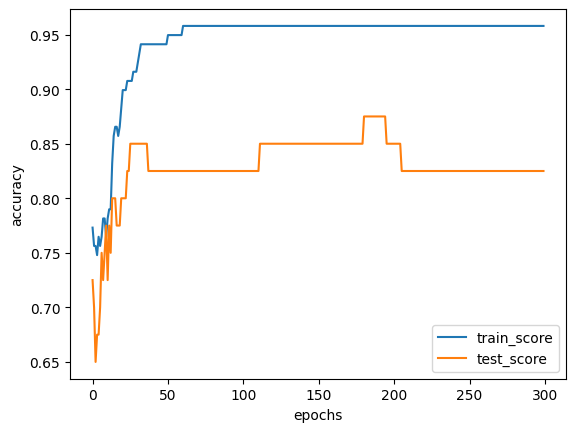

In [12]:
plt.figure()

plt.plot(train_score)
plt.plot(test_score)

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(labels = ["train_score", "test_score"])

plt.show()

In [13]:
np.argmax(test_score)

180

In [15]:
sgd = SGDClassifier(loss = "log_loss", max_iter = 180, tol = None, random_state = 0)
sgd.fit(scaled_train, y_train)
print(sgd.score(scaled_train, y_train))
print(sgd.score(scaled_test, y_test))

0.957983193277311
0.85


- SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 자동으로 훈련을 멈추고 종료함
    - tol매개변수에서 최소 향상값을 지정
    - tol이 None이 되면 자동으로 멈추지 않고 max_iter만큼 반복함

In [16]:
sgd_hinge = SGDClassifier(loss = "hinge", max_iter = 180, tol = None, random_state = 0)
sgd_hinge.fit(scaled_train, y_train)
print(sgd_hinge.score(scaled_train, y_train))
print(sgd_hinge.score(scaled_test, y_test))

0.9159663865546218
0.725


- SGDClassifier의 loss 매개변수의 기본값은 hinge(힌지 손실)임
- 힌지 손실은 support vector machine(서포트 벡터 머신)을 위한 손실 함수
- SGDClassifier는 다양한 손실함수를 지원함